# Welcome to Algosoc, the soceity for algorithmic trading and quantitative finance at Imperial

## Who are We?

We are founded in March 2018 with the aim to provide education and networking opportunities for students interested in algorithmic trading and quantitative finance. In 2018 and 2019 we organise the Algothon with Blackrock which is the flagship event of our soceity. Algothon 2020 was cancelled this year due to covid-19. This year we will be running courses online. 

http://www.algosoc.com/

Please join the society by subscribing on the union website. Membership is free. Becoming a member of the soceity allows you to join our exclusive networking events and receive up-to-date news through our mailing list. 

https://www.imperialcollegeunion.org/activities/a-to-z/algorithmic-trading


## Algosoc Portfolio

We will be running trading strategies on different platforms, such as Quantopian. We welcome students to contribute by developing trading strategies and signals. We will guide you through the steps to write your first algo. Details in how to contribute will be annouced through our mailing list.

Our asset universe includes US Equities and Futures. Most stratgies running are at daily resolution 


## Algosoc Toolbox 

We are building a collection of tools useful for algorithmic trading which are avaliable on Github. If you would like to contribute, please email us. 

https://github.com/algotradingsoc/pedlar_2020




Plan for today

We will go through the really basics of (quantitative) finance for the rest of the session followed by an Q&A. Experienced members are wellcomed to check out the tools we are building on Github. 



The notebook uses data from Quantopian which could only be run on their platform due to data licensing. Please create an account at Quantopian https://www.quantopian.com/ as most teaching is done on Quantopian

Lecture 1: Understanding financial data

## Price data

The most basic data to be dealt with in quantitative finance is price data, which represent how much a financial asset is worth at a given time. Traditionally (90s), time series models such as ARIMA model are used widely in trading to capture trends in the market. Recently, the focus has moved to using deep learning models such as LSTM and CNN to learn more complicated behaviour.

https://reference.wolfram.com/language/ref/ARIMAProcess.html 
https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM


Price data is determined by two charactereistics, frequency of data and types of data. Frequency of data can ranged from microseconds data (tick level) to end-of-data data (daily resolution). We will focus on data that have a minute resoluion or above. Major types of data include bar data, trade data and quote data. 

In an exchange, quote data (Orderbook) is displayed for a stock in real time which has the bid and ask price (with size) submitted by different market participants. A trade is made if someone is willing the buy the security at the ask price (or sell the security at the bid price). Bar data is then aggregrated using the trade price and volume over an interval, which usually is a minute, an hour and a day. 

https://iextrading.com/apps/tops/







### Bar data on Quantopian

Bar data for stocks are provided in the following format (OHLCV), which summarise transactions conducted within the time period. 4 representative prices are provided, namely Open, High, Low, Close. Volume is the sum of the number of shares traded over the time period. 

https://images.app.goo.gl/7QKVKYWw9jpC4jVx5



Example of daily bar data of SPY, SPDR S&P 500, the most popular ETF to track the Standard & Poor's 500 Index.

In [1]:
from quantopian.research.experimental import history
from quantopian.research import symbols
SPY = history('SPY', fields=['open_price','high','low','close_price','volume'],frequency='daily',start='2020-01-01',end='2020-06-30')
SPY.tail(10)

,open_price,high,low,close_price,volume
2020-06-17 00:00:00+00:00,312.694,313.012,309.498,310.205,57146657.0
2020-06-18 00:00:00+00:00,308.646,310.931,308.154,310.374,54660030.0
2020-06-19 00:00:00+00:00,314.170,314.380,306.530,308.580,83281693.0
2020-06-22 00:00:00+00:00,307.990,311.050,306.750,310.660,53058402.0
2020-06-23 00:00:00+00:00,313.490,314.500,311.610,312.030,49727084.0
2020-06-24 00:00:00+00:00,309.840,310.510,302.100,304.130,101180605.0
2020-06-25 00:00:00+00:00,303.470,307.640,301.280,307.290,67908534.0
2020-06-26 00:00:00+00:00,306.160,306.390,299.420,300.020,92007892.0
2020-06-29 00:00:00+00:00,301.410,304.450,298.930,304.440,56700943.0
2020-06-30 00:00:00+00:00,303.990,310.200,303.820,308.590,74623073.0


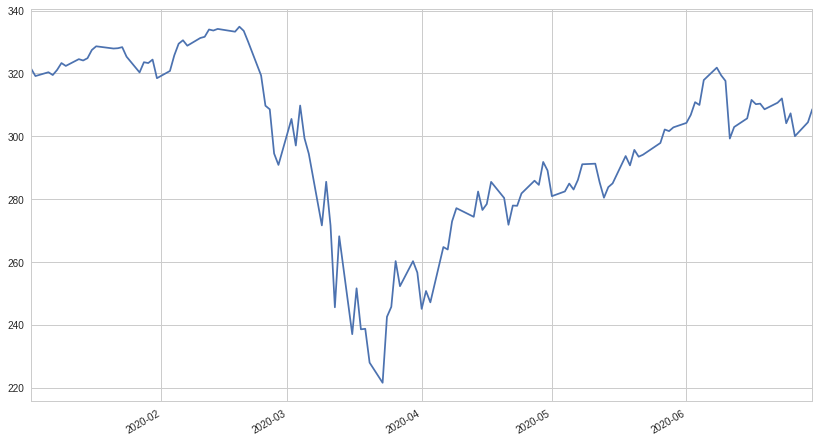

In [2]:
SPY['close_price'].plot()

## Pipeline on Quantopian

Data on quantopian are organised into different datasets which can be aggregated using Pipelines in research notebook and trading algos. Pipelines can be regarded as pandas dataframes with index by time and assets.

Data Reference: https://www.quantopian.com/docs/data-reference/overview   
Pipeline: https://www.quantopian.com/tutorials/pipeline



In [5]:
import datetime 

from quantopian.pipeline import CustomFactor, Pipeline
from quantopian.pipeline.data.morningstar import Fundamentals
from quantopian.pipeline.domain import US_EQUITIES, GB_EQUITIES, HK_EQUITIES, DE_EQUITIES
from quantopian.research import run_pipeline, symbols
from quantopian.pipeline.data import EquityPricing

from quantopian.pipeline.factors import Returns 
from quantopian.pipeline.filters import  StaticAssets, QTradableStocksUS

# Get the latest daily close price for all equities.
yesterday_close = EquityPricing.close.latest

# Get the latest daily trading volume for all equities.
yesterday_volume = EquityPricing.volume.latest

Top_350 = Fundamentals.market_cap.latest.rank(ascending=False) <= 350


Stocks = ['HSY','MSFT','GLW','AXP','FB','NVR','RL','WPM','KKR','FCX']




# Add the factor to the pipeline.
pipe = Pipeline({
                'close': yesterday_close,
                'volume': yesterday_volume,
                'return': Returns([EquityPricing.close],window_length=252),
                'cap': Fundamentals.market_cap.latest,
                'eps': Fundamentals.normalized_diluted_eps_earnings_reports.latest
        },
        domain = US_EQUITIES,
        # screen = Top_350 & (EquityPricing.volume.latest>1000),
        screen = StaticAssets(symbols(Stocks)),
)


refday = datetime.datetime.now() + datetime.timedelta(days=-1)
today = refday.replace(year=refday.year-1).date()
yesterday = today.replace(year=today.year-2)
print('Start date {} End date {}'.format(yesterday,today))

df = run_pipeline(pipe, yesterday, refday)
# Run the pipeline over a year and print the result.
df.tail(20)

Start date 2017-10-05 End date 2019-10-05


cap     close  \
2020-10-05 00:00:00+00:00 Equity(679 [AXP])    8.181242e+10   101.630   
                          Equity(3241 [GLW])   2.499388e+10    32.810   
                          Equity(3695 [HSY])   2.973057e+10   142.850   
                          Equity(5061 [MSFT])  1.560374e+12   206.180   
                          Equity(5513 [NVR])   1.553143e+10  4184.900   
                          Equity(13197 [FCX])  2.314836e+10    15.950   
                          Equity(24832 [RL])   5.108015e+09    69.960   
                          Equity(27437 [WPM])  2.202265e+10    48.965   
                          Equity(39905 [KKR])  2.967214e+10    35.100   
                          Equity(42950 [FB])   7.405212e+11   259.910   
2020-10-06 00:00:00+00:00 Equity(679 [AXP])    8.364819e+10   103.900   
                          Equity(3241 [GLW])   2.554236e+10    33.540   
                          Equity(3695 [HSY])   2.990739e+10   143.740   
                          Equity(5061 [MSFT])  1.592083e+12   210.370   
                          Equity(5513 [NVR])   1.560770e+10  4215.580   
                          Equity(13197 [FCX])  2.370021e+10    16.320   
                          Equity(24832 [RL])   5.244608e+09    71.740   
                          Equity(27437 [WPM])  2.228745e+10    49.830   
                          Equity(39905 [KKR])  3.047500e+10    36.060   
                          Equity(42950 [FB])   7.539391e+11   264.650   

                                                     eps    return      volume  
2020-10-05 00:00:00+00:00 Equity(679 [AXP])     0.290000 -0.099213   2691156.0  
                          Equity(3241 [GLW])   -0.165586  0.209206   2940522.0  
                          Equity(3695 [HSY])    1.319449 -0.073111    275023.0  
                          Equity(5061 [MSFT])   1.383552  0.509867  22561245.0  
                          Equity(5513 [NVR])   42.500000  0.129119      7252.0  
                          Equity(13197 [FCX])   0.034506  0.825298  21289541.0  
                          Equity(24832 [RL])   -1.657880 -0.222880   1064012.0  
                          Equity(27437 [WPM])   0.235000  0.834813    912149.0  
                          Equity(39905 [KKR])  -1.142763  0.380260   1665341.0  
                          Equity(42950 [FB])    1.800000  0.440743  10806476.0  
2020-10-06 00:00:00+00:00 Equity(679 [AXP])     0.290000 -0.073014   1832859.0  
                          Equity(3241 [GLW])   -0.165586  0.240094   2896021.0  
                          Equity(3695 [HSY])    1.319449 -0.068637    201571.0  
                          Equity(5061 [MSFT])   1.383552  0.551900  13910185.0  
                          Equity(5513 [NVR])   42.500000  0.145834      8495.0  
                          Equity(13197 [FCX])   0.034506  0.880433  12724954.0  
                          Equity(24832 [RL])   -1.657880 -0.204152    742086.0  
                          Equity(27437 [WPM])   0.235000  0.869998    616610.0  
                          Equity(39905 [KKR])  -1.142763  0.396952   1271559.0  
                          Equity(42950 [FB])    1.800000  0.472896   8402038.0

In [4]:
df.tail(20)

cap     close        eps  \
2020-10-05 00:00:00+00:00 Equity(679 [AXP])     114.0   101.630   0.290000   
                          Equity(3241 [GLW])    390.0    32.810  -0.165586   
                          Equity(3695 [HSY])    314.0   142.850   1.319449   
                          Equity(5061 [MSFT])     3.0   206.180   1.383552   
                          Equity(5513 [NVR])    554.0  4184.900  42.500000   
                          Equity(13197 [FCX])   419.0    15.950   0.034506   
                          Equity(24832 [RL])   1094.0    69.960  -1.657880   
                          Equity(27437 [WPM])   433.0    48.965   0.235000   
                          Equity(39905 [KKR])   316.0    35.100  -1.142763   
                          Equity(42950 [FB])      7.0   259.910   1.800000   
2020-10-06 00:00:00+00:00 Equity(679 [AXP])     114.0   103.900   0.290000   
                          Equity(3241 [GLW])    388.0    33.540  -0.165586   
                          Equity(3695 [HSY])    319.0   143.740   1.319449   
                          Equity(5061 [MSFT])     3.0   210.370   1.383552   
                          Equity(5513 [NVR])    558.0  4215.580  42.500000   
                          Equity(13197 [FCX])   419.0    16.320   0.034506   
                          Equity(24832 [RL])   1093.0    71.740  -1.657880   
                          Equity(27437 [WPM])   432.0    49.830   0.235000   
                          Equity(39905 [KKR])   314.0    36.060  -1.142763   
                          Equity(42950 [FB])      7.0   264.650   1.800000   

                                                 return      volume  
2020-10-05 00:00:00+00:00 Equity(679 [AXP])   -0.099213   2691156.0  
                          Equity(3241 [GLW])   0.209206   2940522.0  
                          Equity(3695 [HSY])  -0.073111    275023.0  
                          Equity(5061 [MSFT])  0.509867  22561245.0  
                          Equity(5513 [NVR])   0.129119      7252.0  
                          Equity(13197 [FCX])  0.825298  21289541.0  
                          Equity(24832 [RL])  -0.222880   1064012.0  
                          Equity(27437 [WPM])  0.834813    912149.0  
                          Equity(39905 [KKR])  0.380260   1665341.0  
                          Equity(42950 [FB])   0.440743  10806476.0  
2020-10-06 00:00:00+00:00 Equity(679 [AXP])   -0.073014   1832859.0  
                          Equity(3241 [GLW])   0.240094   2896021.0  
                          Equity(3695 [HSY])  -0.068637    201571.0  
                          Equity(5061 [MSFT])  0.551900  13910185.0  
                          Equity(5513 [NVR])   0.145834      8495.0  
                          Equity(13197 [FCX])  0.880433  12724954.0  
                          Equity(24832 [RL])  -0.204152    742086.0  
                          Equity(27437 [WPM])  0.869998    616610.0  
                          Equity(39905 [KKR])  0.396952   1271559.0  
                          Equity(42950 [FB])   0.472896   8402038.0

Demo: Sample algo provided by Quantopian

We will run a sample algorithm provided by Quantopian to show how to use the backtest environment and how do we evaluate the perfomance of a trading algorithm

### Future plans

    Lecture 2: How to write a simple algo on Quantopian 
    Lecture 3: Non-stationaity of time-series data 
    Lecture 4: Using decision trees on fundamentals data 